In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats

In [2]:
ORGANISMS = [9606] # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERM = "sugar transmembrane transporter activity"
# GO_TERM = "amino acid transmembrane transporter activity",
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_human_sugarvsrest"
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = True  # If false, use cached results, e.g. to create more plots

## Full dataset

In [3]:
dataset_unfiltered = get_transmembrane_transporter_dataset( 
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 3874 sequences into 1029 clusters at threshold 50
cd-hit: clustered 3874 sequences into 1347 clusters at threshold 70
cd-hit: clustered 3874 sequences into 1774 clusters at threshold 90
cd-hit: clustered 3874 sequences into 3408 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              50                       1   
                                                                          70                       1   
                                                                          90                       5   
                                                                          100                      9   
                                                                          None                    10   
                                               transcript_level           50                      54   
                                                                          70                      77   
                                                                          90                     152   
                                                                          100                    665   
                                                                          None                   771   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       1   
                                                                          100                      2   
                                                                          None                     2   
                   True          computational protein_level              50                     142   
                                                                          70                     211   
                                                                          90                     419   
                                                                          100                   1031   
                                                                          None                  1175   
                                               transcript_level           50                      31   
                                                                          70                      46   
                                                                          90                     100   
                                                                          100                    501   
                                                                          None                   687   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       2   
                                                                          100                      4   
                                                                          None                     5   
True               True          computational protein_level              50                     552   
                                                                          70                     741   
                                                                          90                     819   
                                                                          100                    919   
                                                                          None                   945   
                                               transcript_level           50                       6   
                                                                          70                      10   
                              

## Filtered Subset

In [4]:
dataset_organism = get_transmembrane_transporter_dataset(  
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

cd-hit: clustered 1121 sequences into 846 clusters at threshold 50
cd-hit: clustered 1121 sequences into 1039 clusters at threshold 70
cd-hit: clustered 1121 sequences into 1110 clusters at threshold 90
cd-hit: clustered 1121 sequences into 1118 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     846   
                                                                        70                    1039   
                                                                        90                    1110   
                                                                        100                   1118   
                                                                        None                  1121   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              534  
                                                                        70              563  
                                                                        90              570  
                                                                        100             570  
                                                                        None            570

## Sugar/Amino subset

In [5]:
from subpred.dataset_filters import get_proteome_classification_subset

dataset_organism = get_proteome_classification_subset(
    dataset_full=dataset_organism, go_term=GO_TERM
)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
!!NOT|sugar transmembrane transporter activity    1095
sugar transmembrane transporter activity            26
Name: count, dtype: int64

In [6]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
!!NOT|sugar transmembrane transporter activity    1077
sugar transmembrane transporter activity            25
Name: count, dtype: int64

Clustering at 70%

In [7]:
from subpred.dataset_filters import cluster_sequences

dataset_organism = cluster_sequences(
    dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD
)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 1102 sequences into 1023 clusters at threshold 70


go_term_ancestor
!!NOT|sugar transmembrane transporter activity    999
sugar transmembrane transporter activity           24
Name: count, dtype: int64

## Feature generation

In [8]:
from subpred.features import get_features

features_list, series_labels = get_features(
    dataset_full=dataset_organism, include_pssm_features=False
)

2025-05-30 20:43:18.264537: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-30 20:43:18.270552: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748630598.276252   82253 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748630598.278179   82253 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-30 20:43:18.285162: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

For each Feature: Outlier detection, numpy conversion 

In [9]:
from subpred.features import get_ml_datasets

ml_datasets = list(get_ml_datasets(features_list=features_list, series_labels=series_labels))
ml_datasets

[Name: DUMMY, Features: 1024, Samples: 1023, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AAC, Features: 20, Samples: 1023, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: PAAC, Features: 400, Samples: 1023, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AA_KMER3, Features: 8000, Samples: 1023, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_COMP, Features: 20, Samples: 1023, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 1023, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']

did the class assignment work correctly?

In [10]:
# saving as pickle, to load in different notebook with different env,
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle

with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", "wb") as handle:
    pickle.dump(ml_datasets, handle)

## Outliers

In [11]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_organism, ml_datasets=ml_datasets, threshold=0.8)

,outlier_count,protein_names,go_term_ancestor
Uniprot,,,


## Model evaluation SVM

In [ ]:
ml_datasets = [
    ml_dataset
    for ml_dataset in ml_datasets
    if "KMER3" not in ml_dataset.name and "T5" not in ml_dataset.name
]  # removing kmer3 and embedding features because they take too long

In [19]:
ml_datasets = [
    ml_dataset
    for ml_dataset in ml_datasets
    if ml_dataset.name in {"AAC", "3Di_KMER2"}
]  # removing kmer3 and embedding features because they take too long

In [20]:
ml_datasets#[0]

[Name: AAC, Features: 20, Samples: 1023, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 1023, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity'])]

In [ ]:
from subpred.evaluation import (
    get_svm_results,
    plot_results_long,
    summarize_results_long,
)
from sklearn.metrics import (
    f1_score,
    make_scorer,
    fbeta_score,
    average_precision_score,
    recall_score,
    precision_score,
)

f2 = make_scorer(fbeta_score, pos_label=1, beta=2)
scoring_outer = {
    "Balanced Accuracy": "balanced_accuracy",
    "F1 Macro": "f1_macro",
    "F1 Other": make_scorer(f1_score, pos_label=0),  # labels are encoded in lex. order
    "F1 Sugar": make_scorer(f1_score, pos_label=1),
}

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    repeats=10,
    n_jobs_inner=-1,
    n_jobs_outer=1,
    scoring_inner="f1_macro",  
    scoring_outer=scoring_outer,
)

=== AAC ===
Balanced Accuracy: 0.73+-0.12
F1 Macro: 0.67+-0.09
F1 Other: 0.98+-0.01
F1 Sugar: 0.36+-0.17
=== 3Di_KMER2 ===
Balanced Accuracy: 0.87+-0.09
F1 Macro: 0.92+-0.06
F1 Other: 1.00+-0.00
F1 Sugar: 0.83+-0.12


In [24]:
summarize_results_long(df_results_long=df_results_long)


Mean    Median      Sdev
Feature   Metric                                         
3Di_KMER2 Balanced Accuracy  0.874150  0.895000  0.087050
          F1 Macro           0.915138  0.927325  0.060257
          F1 Other           0.996608  0.997500  0.002351
          F1 Sugar           0.833667  0.857143  0.118267
AAC       Balanced Accuracy  0.727886  0.697487  0.121703
          F1 Macro           0.666812  0.651361  0.087186
          F1 Other           0.977911  0.979899  0.010506
          F1 Sugar           0.355713  0.333333  0.168452

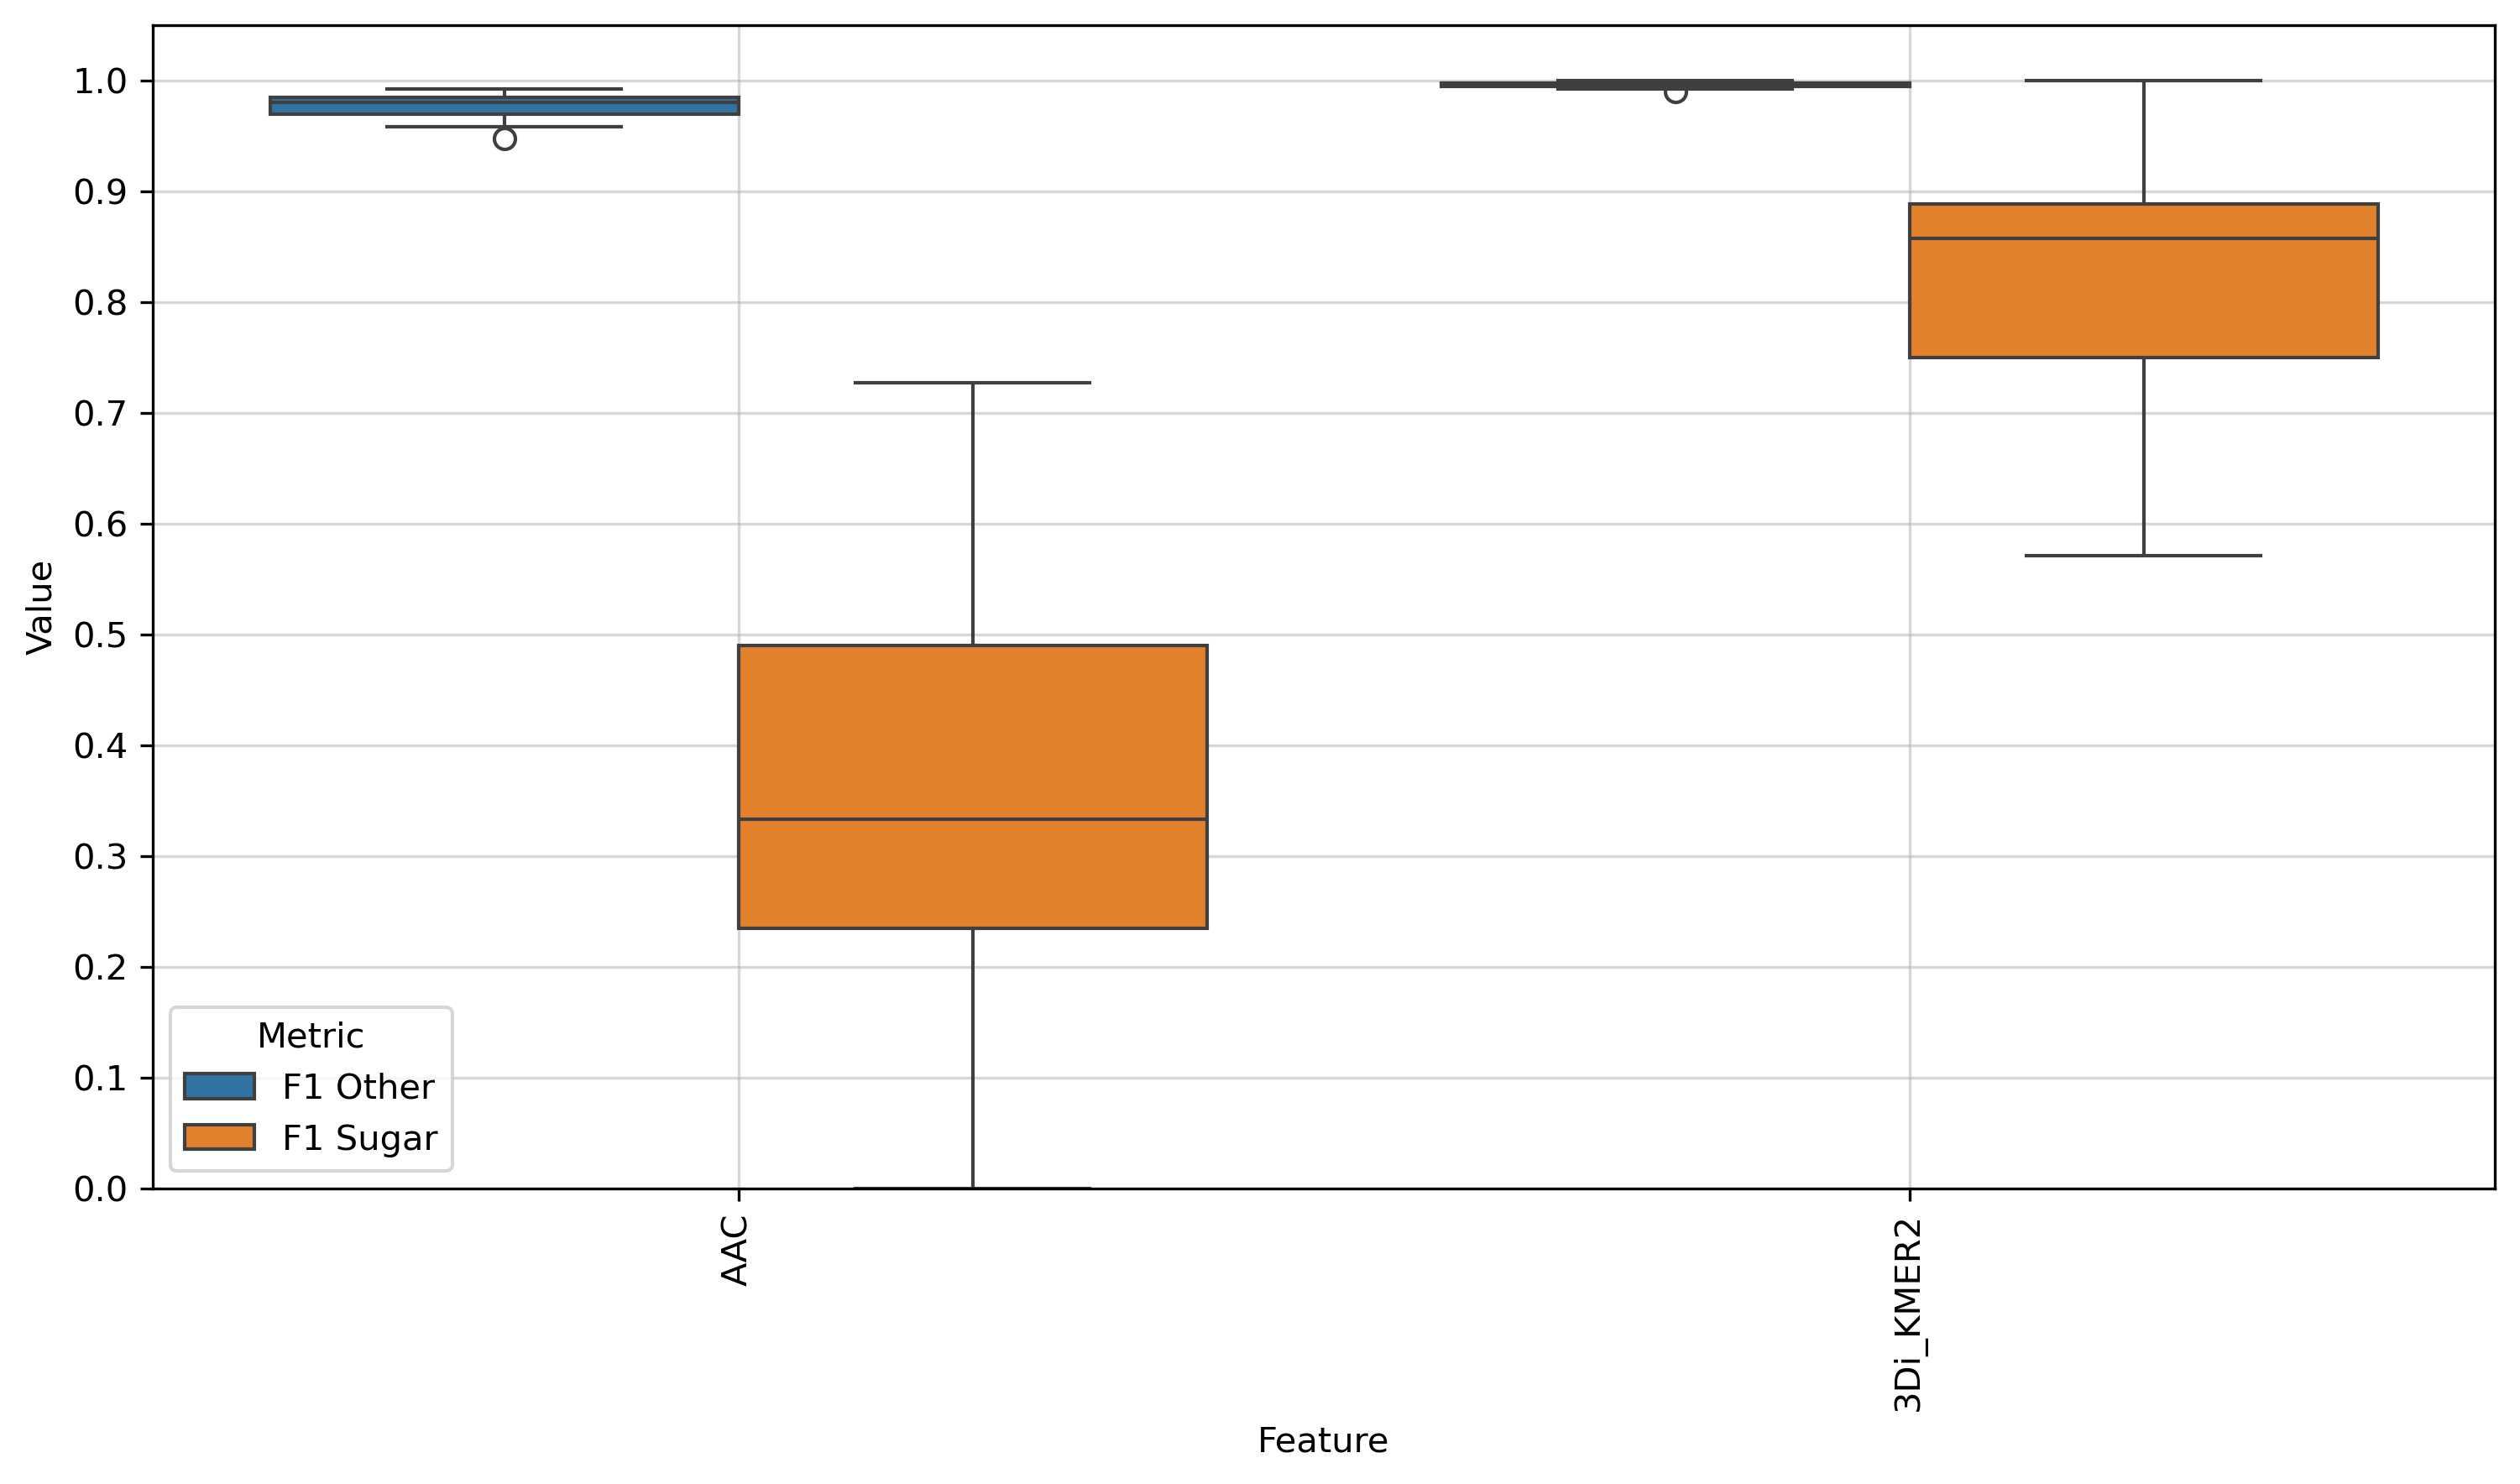

In [25]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["F1 Sugar", "F1 Other"]
)

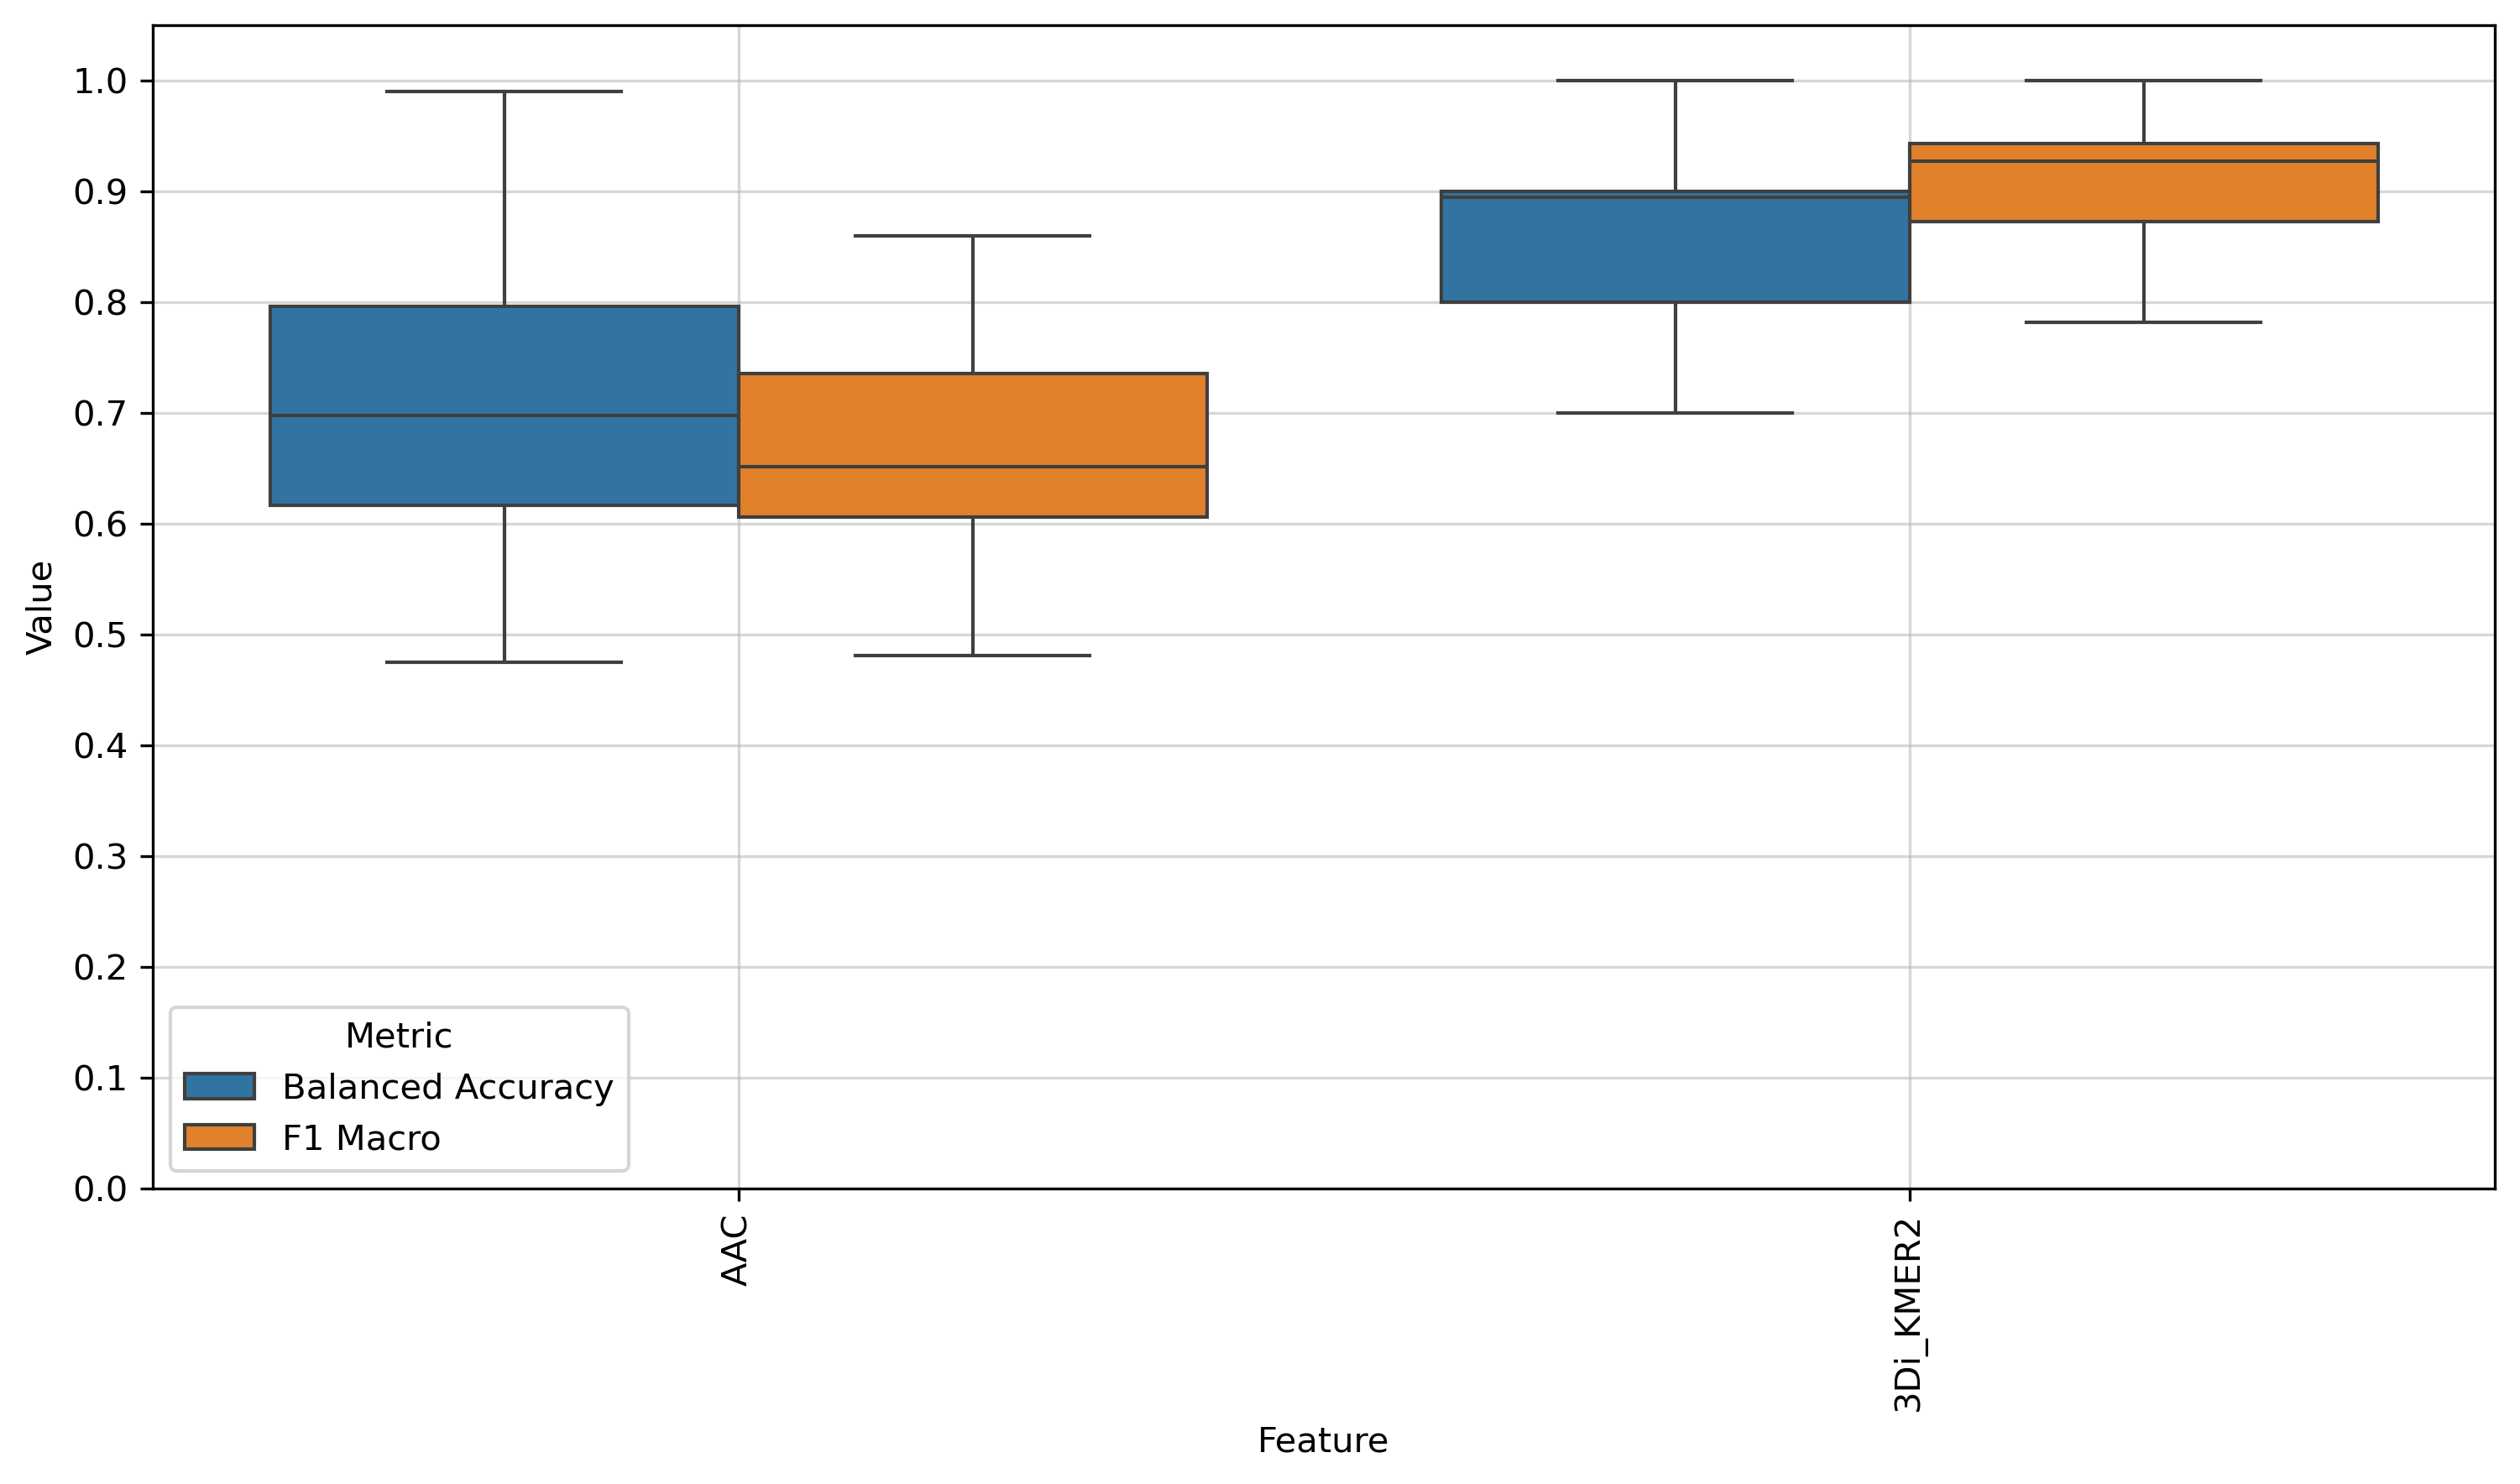

In [26]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["F1 Macro", "Balanced Accuracy"]
)